#SCRIVERE DATI from txt
##USANDO funzioni standard di python

In [ ]:
with open ('sample.txt', 'w') as output_file :
    for item in sample:   #sample potrebbe essere una lista/vettore di cui leggo ciascun valore
        # write each item on a new line
        output_file.write (str (item) + '\n')

#LEGGERE DATI
#USANDO funzioni standard di python

In [ ]:
with open ('sample.txt') as input_file:
    sample = [float (x) for x in input_file.readlines()]

#The sample variable is an existing collection of numbers
#he printout adds a carriage return symbol \n, so to ensure that the numbers are saved in different lines


FileNotFoundError: ignored

#E' tutto piu semplice usando i comandi da NUMPY per leggere e scrivere dati:


In [ ]:
import numpy as np

data = np.genfromtxt('./fake_data.txt',   #uso la funzione np.genfromtxt. siccome il file si trova nella stessa directory mi basta ./ altrimenti aggiungere ...
                     delimiter="|",  #per escludere la linea nel file di testo, mi servono solo i dati grezzi
                     skip_header=2,  #voglio ignorare le righe di commento, aprire il txt e vedere quante sono, poi escludi quelle righe
                     names=True)  #i nomi delle colonne dei dati invece li voglio

print('Column names and dtypes: ', data.dtype)
print('Data array shape: ',data.shape)

np.savetxt('./fake_data.txt',xx,
           header='giorno \t | temp \t | press',
           comments='# fake data\n# generated by me\n',
           delimiter='\t|',
           fmt='%1.3f')

FileNotFoundError: ignored

#ISTOGRAMMI:

NameError: ignored

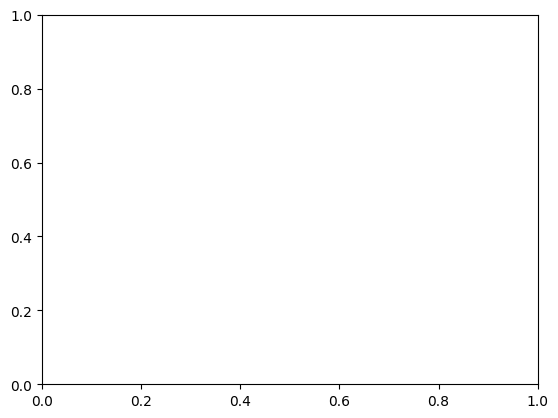

In [ ]:
fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (sample,
         color = 'orange',
        )


In [ ]:
bin_edges = np.linspace (xMin, xMax, N_bins)  #con linspace ho il numero di bin equispaziati tra xmin  e xmax fissati
print ('length of the bin_edges container:', len (bin_edges))  #lunbghezza del bin
fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (sample,
         bins = bin_edges,
         color = 'orange',
        )

NameError: ignored

#IL NUMERO DEI BIN
##qual è il numero di bin ideale, giusto, da utilizzare? REGOLA DI STURGE

In [ ]:
import numpy as np
def sturges (N_events) :
     return int( np.ceil( 1 + 3.322 * np.log(N_events) ) )##questa è la formula della regola di sturge.
     #il log sta per abbassare il numero dei bin all'aumentare di n (?), comuqne ne abbassa il grado.
#-----

N_bins = sturges (len (sample))
bin_edges = np.linspace (xMin, xMax, N_bins)

##oppure uso la scala logaritmica sugli assi:

In [ ]:
#When the values in different bins change considerably,
#it can be convenient to visualize histograms on a logarithmic scale (along the horizontal or vertical axis), to improve the readability of the result

ax.set_yscale ('log')

#Istogramma: serve anche per ricavare info statistiche: CALCOLO DEI MOMENTI DELLA DISTR
##i momenti li calcolo inziando a sostituire l'integrale con una sommatoria

In [ ]:


return sum (sample) / len (sample)   ##cosi ho la sommatoria (cioe Sommatoria di xi/N)

#the python function sum calculates the sum of the sample elements
#the python function len calculates its number of elements
#----------------

#once the average is known, its drawing may be added on top of a histogram:
ax.hist (sample,
         bins = bin_edges,
         color = 'orange',
        )
vertical_limits = ax.get_ylim () #asse verticale per indicare graficare la media, get_ylim() : RESTITUISCE ymin e ymax (il valore min e max delle y, poi matplot li unisce con una linea)
ax.plot ([sample_mean, sample_mean], vertical_limits, color = 'blue')

NameError: ignored

#DATA MODELS: **LIBRERIA SCIPY**
## https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

In [ ]:
## in partocolare scipy.stat

#All continuous distributions take loc and scale as keyword parameters to adjust the location and scale of the distribution

# Using a continuous probability density function:


from scipy.stats import norm  #NORM è la funzione gaussiana di base

#per la media e varianza uso il metodo pdf di norm: gli associo i seguenti parametri
mean = 1.
sigma = 0.5 #SE NON LE SPECIFICO NORM MI RESTITUISCE PDF STANDARD (mean=0 e sigma=1)
x = mean + sigma / 2. #il punto dove calcolo
print (norm.pdf (x, mean, sigma)) #stampa il valore che assuma la pdf gaussiana in corrisp di x, questa gaussiana avra media =1  e sigma = 0.5


SyntaxError: ignored

In [ ]:
#MODO ALTERNATIVO:
from scipy.stats import norm
mean = 1.
sigma = 0.5
x=mean+ sigma/2.

norm_fix = norm (mean, sigma) #definiti mean e sigma uso direttamente la funzione norm
print (norm_fix.pdf (x))

0.704130653528599


##The cumulative density function

In [ ]:
#.ddf

print ('the value of the Gaussian distribution cumulative at its mean is: ' +
       str (norm.cdf (mean, mean, sigma))
       )

##Calcolo dei momenti della distr

In [ ]:
ave, var, skew, kurt = norm_fix.stats (moments='mvsk')
print (ave, var, skew, kurt) ##stampo la lista dei momenti

#Integrazione numerica

In [ ]:

#quad

from scipy.integrate import quad
# definition of a polinomial function
def polin(x): return x**2 + x + 1

area = quad (polin, 0., 4.)
print ('area = ', area[0])
print ('absolute error estimate = ', area[1])

#integrali con estremi infiniti

In [ ]:
def expon (x): return exp (-1 * x)

area = quad (expon, 0, np.inf)

##ESEMPI COMPLETI DELLA LEZIONE:

##disegnare un istogramma

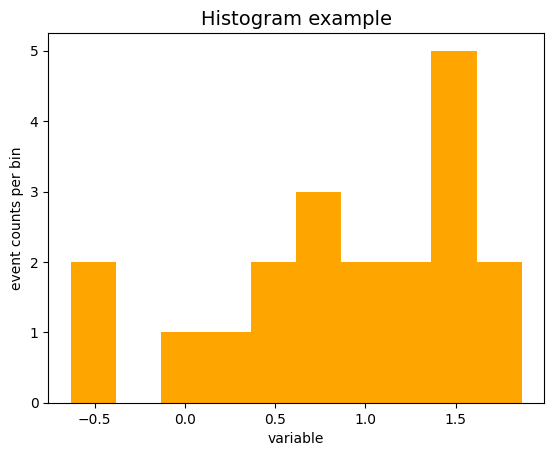

In [5]:
#!/usr/bin/python
'''
example on the use of matplotlib.pyplot
to draw a histogram with automatic binning setup
'''

import matplotlib.pyplot as plt
import numpy as np


def main () :
    '''
    Funzione che implementa il programma principale
    '''

    # the sample to be represented as an histogram: è UN VETTORE
    sample = [1.3977702773941403, 0.74021968956204, 0.559129026598526,
              0.034722468927208275, 1.472659179569878, 1.2276631640103624,
              1.0483359119412394, 0.8904343375674812, 0.14771386083901775,
              1.8655990499580688, 1.3776373531042858, 1.3348079223655975,
              -0.6326424273210922, -0.612527851941395, 1.594263621951928,
              0.510681111246625, 0.7427516727970715, 1.6250978742928908,
              0.6773261829611841, 1.4922122786883083]

    fig, ax = plt.subplots (nrows = 1, ncols = 1) #1 grafico unico.
    ax.hist (sample,  #la funz hist richiama il vettore dei dati (sample)
             color = 'orange',
            )

    #plt.figure()   #QUALORA VOLESSI USARE questa implmentazione con solo plt
    #plt.hist(sample)
    #plt.xlabel("...") ...

    ax.set_title ('Histogram example', size=14) #titolo
    ax.set_xlabel ('variable')    #titolo assex
    ax.set_ylabel ('event counts per bin') #titolo assey

    plt.savefig ('drawing_03.png')   #salva la figura
    plt.show ()
    #plt.close()

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----


if __name__ == "__main__":
    main ()


##disegnare istogramma con un binnaggio predefinito


length of the bin_edges container: 10


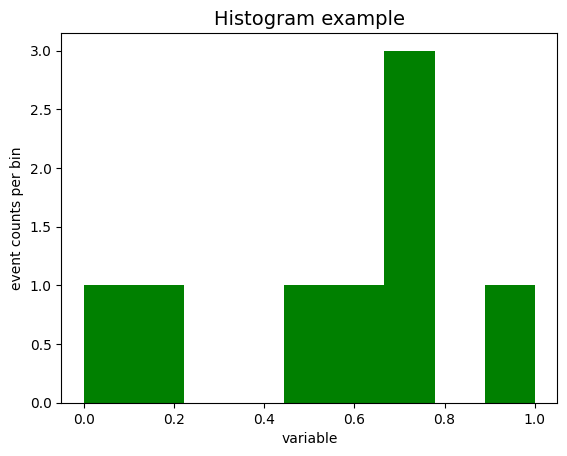

In [9]:
#!/usr/bin/python
'''
example on the use of matplotlib.pyplot
with predefined binning
'''

import matplotlib.pyplot as plt
import numpy as np


def main () :
    '''
    Funzione che implementa il programma principale
    '''

    # the sample to be represented as an histogram
    sample = [1.3977702773941403, 0.74021968956204, 0.559129026598526, 0.034722468927208275, 1.472659179569878, 1.2276631640103624, 1.0483359119412394, 0.8904343375674812, 0.14771386083901775, 1.8655990499580688, 1.3776373531042858, 1.3348079223655975, -0.6326424273210922, -0.612527851941395, 1.594263621951928, 0.510681111246625, 0.7427516727970715, 1.6250978742928908, 0.6773261829611841, 1.4922122786883083]

    N_bins = 10 #parametri fissati
    xMin = 0.
    xMax = 1.

    bin_edges = np.linspace (xMin, xMax, N_bins) #va a dividere l'intervallo in tanti (10)  sottointervallini uguali
    print ('length of the bin_edges container:', len (bin_edges))

    fig, ax = plt.subplots (nrows = 1, ncols = 1)
    ax.hist (sample,
             bins = bin_edges, #bins è un parametro di dafault della funzione hist. In questo caso lo pongo uguale al numero che ho deciso io.
             color = 'green',
            )
    ax.set_title ('Histogram example', size=14)
    ax.set_xlabel ('variable')
    ax.set_ylabel ('event counts per bin')

    plt.savefig ('drawing_04.png')
    plt.show ()


# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----


if __name__ == "__main__":
    main ()


In [11]:
#!/usr/bin/python
'''
example on the use of matplotlib.pyplot
with predefined binning and a reasonable choice
of the bin number
'''

import matplotlib.pyplot as plt
import numpy as np
from math import ceil   #ceil è la parte intera superiore. se il numero è 5.3 mi restituisce 6 ecc


def sturges (N_events) : #SFRUTTA LA REGOLA DI STURGES (che si appllica per i grandi numeri, N)
    return ceil (1 + 3.322 * np.log (N_events))


# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----


def main () :
    '''
    Funzione che implementa il programma principale
    '''

    # the sample to be represented as an histogram
    with open('dati.txt') as f:                     #ho 10k dati nel file dati.txt
        sample = [float (x) for x in f.readlines()] #POTREI USARE DIRETTAMENTE LE FUNZIONI APPOSITE DI np per aprire (np.load...)

    xMin = 0.
    xMax = 1.
    N_bins = sturges (len (sample))
    bin_edges = np.linspace (xMin, xMax, N_bins)
    fig, ax = plt.subplots (nrows = 1, ncols = 1)
    ax.hist (sample,
             bins = bin_edges,
             color = 'orange',
            )
    ax.set_title ('Histogram example', size=14)
    ax.set_xlabel ('variable')
    ax.set_ylabel ('event counts per bin')

    plt.savefig ('drawing_05.png')
    plt.show ()


# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----


if __name__ == "__main__":
    main ()


FileNotFoundError: ignored